In [1]:
from rosbag_to_dataframe import extract_data_from_bag
import pandas as pd

In [2]:
bag_files = ['waterlinked_dvl_05132025_1250']  # List of ROS bag files
topic1 = '/rov/imu'  # Topic to extract data from
fields1 = ['orientation']  # List of fields to extract from the message

dataframe1 = extract_data_from_bag(bag_files, topic1, fields1)

# Expand orientation column into separate x, y, z, w columns
orientation_df = dataframe1['orientation'].apply(lambda q: pd.Series({
    'orientation_x': q.x,
    'orientation_y': q.y,
    'orientation_z': q.z,
    'orientation_w': q.w,
}))

# Combine with original DataFrame
dataframe = pd.concat([dataframe1.drop(columns=['orientation']), orientation_df], axis=1)
dataframe

,orientation_x,orientation_y,orientation_z,orientation_w
0,-0.708436,0.016445,0.705439,0.014293
1,0.706389,-0.018912,-0.707300,-0.019577
2,-0.707898,0.023376,0.705595,0.021669
3,0.705936,-0.024726,-0.707373,-0.025811
4,-0.707680,0.028303,0.705465,0.026599
...,...,...,...,...
187,-0.214102,0.673709,0.216690,0.673292
188,-0.217781,0.672810,0.216878,0.672951
189,-0.215980,0.673021,0.219395,0.672504
190,-0.218609,0.672553,0.217628,0.672697


In [3]:
bag_files = ['waterlinked_dvl_05132025_1250']  # List of ROS bag files
topic2 = '/waterlinked_dvl_driver/odom'  # Topic to extract data from
fields2 = ['pose']  # List of fields to extract from the message

dataframe2 = extract_data_from_bag(bag_files, topic2, fields2)

def extract_position(pose_with_cov):
    pos = pose_with_cov.pose.position
    return pd.Series({'x': pos.x, 'y': pos.y, 'z': pos.z})

# Apply to all rows
position_df = dataframe2['pose'].apply(extract_position)

# Merge with original dataframe (optional)
dataframe2 = pd.concat([dataframe2, position_df], axis=1)

# ✅ Visualize as a DataFrame
dataframe2

,pose,x,y,z
0,geometry_msgs__msg__PoseWithCovariance(pose=ge...,-125.307865,61.456751,99.218864
1,geometry_msgs__msg__PoseWithCovariance(pose=ge...,-125.307865,61.456751,99.218864
2,geometry_msgs__msg__PoseWithCovariance(pose=ge...,-125.307865,61.456751,99.218864
3,geometry_msgs__msg__PoseWithCovariance(pose=ge...,-125.307865,61.456751,99.218864
4,geometry_msgs__msg__PoseWithCovariance(pose=ge...,-125.307376,61.456306,99.218615
...,...,...,...,...
277,geometry_msgs__msg__PoseWithCovariance(pose=ge...,-125.658375,61.691747,98.616316
278,geometry_msgs__msg__PoseWithCovariance(pose=ge...,-125.658375,61.691747,98.616316
279,geometry_msgs__msg__PoseWithCovariance(pose=ge...,-125.658375,61.691747,98.616316
280,geometry_msgs__msg__PoseWithCovariance(pose=ge...,-125.656527,61.689483,98.623782


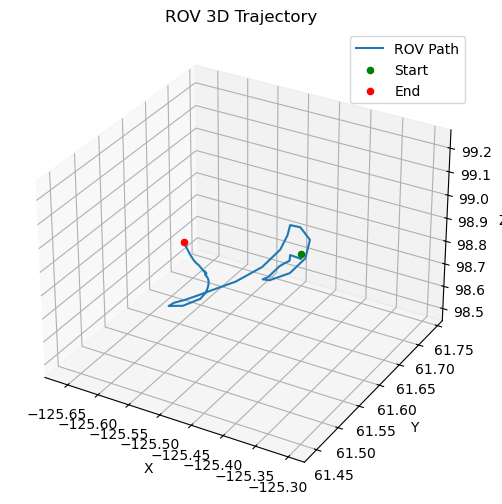

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(position_df['x'], position_df['y'], position_df['z'], label='ROV Path')
ax.scatter(position_df['x'].iloc[0], position_df['y'].iloc[0], position_df['z'].iloc[0], color='green', label='Start')
ax.scatter(position_df['x'].iloc[-1], position_df['y'].iloc[-1], position_df['z'].iloc[-1], color='red', label='End')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('ROV 3D Trajectory')
ax.legend()
plt.show()
